In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random as rnd
import cv2 as cv
from skimage.transform import resize
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import Javascript
#from google.colab import drive
#drive.mount('/content/drive')

#generando imagenes binarias

In [2]:
def potunary(ui,ob):
  if ui!=ob:
    return 1
  else:
    return 0

def potpair(ui,uj,t):
  return min(abs(ui-uj),t)

def energy(L,L0,t):
  E=[]
  alt=np.shape(L)[0]
  anc=np.shape(L)[1]
  for i in range(alt):
    for j in range(anc):
      if i==alt-1:
        if j==anc-1:
          u=potunary(L[i,j],L0[i,j])
          E.append(u)
          continue
        else:
          u=potunary(L[i,j],L0[i,j])
          f=potpair(L[i,j],L[i,j+1],t)
          E.append(u+f)
      else:
        if j==anc-1:
          u=potunary(L[i,j],L0[i,j])
          a=potpair(L[i,j],L[i+1,j],t)
          E.append(u+a)
        else:
          u=potunary(L[i,j],L0[i,j])
          f=potpair(L[i,j],L[i,j+1],t)
          a=potpair(L[i,j],L[i+1,j],t)
          d=potpair(L[i,j],L[i+1,j+1],t)
          E.append(u+(a+d+f))
  return np.sum(E)


Imagen de prueba

array([0., 1.], dtype=float32)

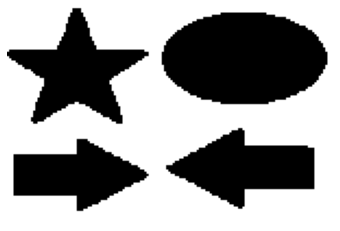

In [3]:
alto=100
ancho=150
im0= plt.imread('https://github.com/JuanDavid1703/Markov-Proyect/raw/main/Image/Prueba.png')
im0= resize(im0, (alto, ancho))[:,:,0]
for i in range(alto):
  for j in range(ancho):
    if im0[i,j]<0.5:
      im0[i,j]=0
    else:
      im0[i,j]=1
plt.imshow(im0,cmap="gray")
plt.axis("off")
np.unique(im0)

###Algoritmo de Metrópólis y reconstrucción con peturbación de 2x2, 3x3 y 4x4

In [9]:
i0=np.random.choice([0.0,1.0],size=(alto,ancho))
ipos1=np.array(i0)
ipos2=np.array(i0)
ipos3=np.array(i0)
T0=4
anc=np.shape(i0)[1]
alt=np.shape(i0)[0]
t=0.8
error1=np.sum(np.abs(im0-i0))
error2=np.sum(np.abs(im0-i0))
error3=np.sum(np.abs(im0-i0))
Ep1=[]
Ep2=[]
Ep3=[]

Er1=[]
Er2=[]
Er3=[]

Er1.append(error1)
Er2.append(error2)
Er3.append(error3)
x1=[]
x2=[]
x3=[]

w1=np.zeros((alt,anc))
w2=np.zeros((alt,anc))
w3=np.zeros((alt,anc))

v1=np.zeros((alt,anc))
v2=np.zeros((alt,anc))
v3=np.zeros((alt,anc))
i=0

In [ ]:
while min([error1,error2,error3])>100 and i<20000:
#Temepratura  para cada tamaño del pixel 
  T1=T0*0.99**i
  T2=T0*0.98**i
  T3=T0*0.95**i
  
  pos=[int(rnd.choice(range(alt))),int(rnd.choice(range(anc)))]

#energía antes del cambio  
  Eant1=energy(ipos1,im0,t)
  Eant2=energy(ipos2,im0,t)
  Eant3=energy(ipos3,im0,t)
  
  v1=np.array(ipos1)
  v2=np.array(ipos2)
  v3=np.array(ipos3)

#2X2
  if ipos1[pos[0],pos[1]]==0:
    try:
      ipos1[pos[0]:pos[0]+2,pos[1]:pos[1]+2]=1
    except:
      ipos1[pos[0],pos[1]]=1
  else:
    try:
      ipos1[pos[0]:pos[0]+2,pos[1]:pos[1]+2]=0
    except:
      ipos1[pos[0],pos[1]]=0

#3x3
  if ipos2[pos[0],pos[1]]==0:
    try:
      ipos2[pos[0]:pos[0]+3,pos[1]:pos[1]+3]=1
    except:
      ipos2[pos[0]:pos[0]-2,pos[1]:pos[1]-2]=1
  else:
    try:
      ipos2[pos[0]:pos[0]+3,pos[1]:pos[1]+3]=0
    except:
      ipos2[pos[0]:pos[0]-2,pos[1]:pos[1]-2]=0
#4x4 
  if ipos3[pos[0],pos[1]]==0:
    try:
      ipos3[pos[0]:pos[0]+4,pos[1]:pos[1]+4]=1
    except:
      ipos3[pos[0]:pos[0]-3,pos[1]:pos[1]-3]=1
  else:
    try:
      ipos3[pos[0]:pos[0]+4,pos[1]:pos[1]+4]=0
    except:
      ipos3[pos[0]:pos[0]-3,pos[1]:pos[1]-3]=0

#energía después de la perturbación
  Epos1=energy(ipos1,im0,t)
  Epos2=energy(ipos2,im0,t)
  Epos3=energy(ipos3,im0,t)

#Deltas de energía
  de1=Epos1-Eant1
  de2=Epos2-Eant2
  de3=Epos3-Eant3

#condición para 2x2
  if de1<=0:
    w1=np.array(ipos1)
    x1.append(w1)
  elif de1>0 and rnd.uniform(0,1)<np.exp(-de1/T1):
    w1=np.array(ipos1)
    x1.append(w1)
  else:
    ipos1=np.array(v1)
    x1.append(v1)

#condición para 3x3
  if de2<=0:
    w2=np.array(ipos2)
    x2.append(w2)
  elif de2>0 and rnd.uniform(0,1)<np.exp(-de2/T2):
    w2=np.array(ipos2)
    x2.append(w2)
  else:
    ipos2=np.array(v2)
    x2.append(v2)

#condición para 4x4

  if de3<=0:
    w3=np.array(ipos3)
    x3.append(w3)
  elif de3>0 and rnd.uniform(0,1)<np.exp(-de3/T3):
    w3=np.array(ipos3)
    x3.append(w3)
  else:
    ipos3=np.array(v3)
    x3.append(v3)

#Errores de coincidencia
  error1=np.sum(np.abs(x1[i]-im0))
  error2=np.sum(np.abs(x2[i]-im0))
  error3=np.sum(np.abs(x3[i]-im0))
  i+=1
  print(i)
  #2x2
  Ep1.append(Epos1)
  Er1.append(error1)
  #3x3
  Ep2.append(Epos2)
  Er2.append(error2)
  #4x4
  Ep3.append(Epos3)
  Er3.append(error3)

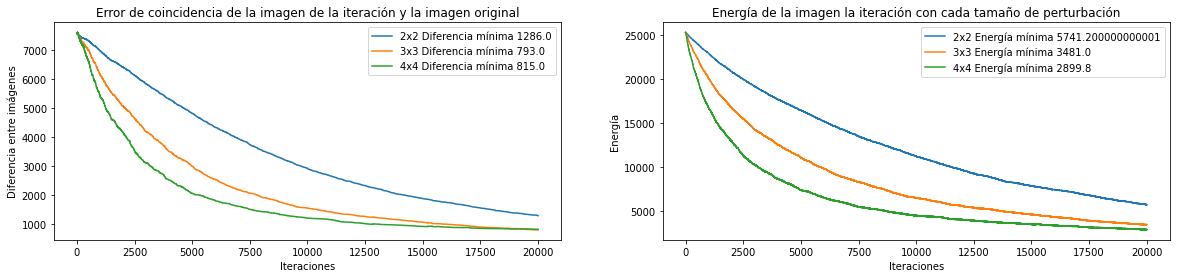

(-0.5, 149.5, 99.5, -0.5)

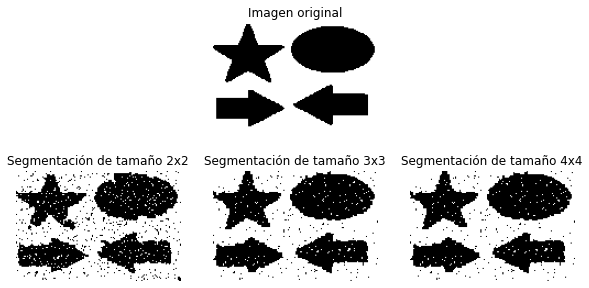

In [28]:
##Gráfica del error con respecto a la imagen original
fi,ax=plt.subplots(1,2)
fi.set_size_inches(20,4)

ax[0].plot(Er1,label=f"2x2 Diferencia mínima {min(Er1)}")
ax[0].plot(Er2,label=f"3x3 Diferencia mínima {min(Er2)}")
ax[0].plot(Er3,label=f"4x4 Diferencia mínima {min(Er3)}")
ax[0].set_xlabel("Iteraciones")
ax[0].set_ylabel("Diferencia entre imágenes")
ax[0].legend()
ax[0].set_title("Error de coincidencia de la imagen de la iteración y la imagen original")

##Gráfica de la energía en la iteración i-ésima

ax[1].plot(Ep1,label=f"2x2 Energía mínima {min(Ep1)}")
ax[1].plot(Ep2,label=f"3x3 Energía mínima {min(Ep2)}")
ax[1].plot(Ep3,label=f"4x4 Energía mínima {min(Ep3)}")
ax[1].legend()
ax[1].set_xlabel("Iteraciones")
ax[1].set_ylabel("Energía")
ax[1].set_title("Energía de la imagen la iteración con cada tamaño de perturbación")
plt.show()

##Resultados de la segmentación binaria

fig, axs = plt.subplots(2,3)
fig.set_size_inches(10,5)

#axs[0,0].imshow(im0,cmap="gray")
#axs[0,0].set_title("Imagen original")
axs[0,0].axis("off")

axs[1,0].imshow(x1[i-1],cmap="gray")
axs[1,0].set_title("Segmentación de tamaño 2x2")
axs[1,0].axis("off")

axs[0,1].imshow(im0,cmap="gray")
axs[0,1].set_title("Imagen original")
axs[0,1].axis("off")
axs[1,1].imshow(x2[i-1],cmap="gray")
axs[1,1].set_title("Segmentación de tamaño 3x3")
axs[1,1].axis("off")

#axs[0,2].imshow(im0,cmap="gray")
#axs[0,0].set_title("Imagen original")
axs[0,2].axis("off")

axs[1,2].imshow(x2[i-1],cmap="gray")
axs[1,2].set_title("Segmentación de tamaño 4x4")
axs[1,2].axis("off")


####Animación

In [35]:
%%capture
fig,ax = plt.subplots(1,3);
fig.set_size_inches(6,3)
def animate(i):
       ax[0].clear()
       ax[0].set_axis_off()
       ax[0].set_title("2x2")
       ax[0].imshow(x1[200*i],cmap="gray")
       ax[1].clear()
       ax[1].set_axis_off()
       ax[1].set_title("3x3")
       ax[1].imshow(x2[200*i],cmap="hot")
       ax[2].clear()
       ax[2].set_axis_off()
       ax[2].set_title("4x4")
       ax[2].imshow(x3[200*i],cmap="coolwarm")
ani = animation.FuncAnimation(fig,animate,frames=100,interval=50,blit=False)
rc('animation', html='jshtml')

In [ ]:
Javascript('document.querySelector(".anim-state").state.value="once" ')
Javascript('document.querySelector(".anim-controls > button:nth-child(6)").click()')
ani

In [37]:
ani.save("Variostamaños.mp4")